In [0]:
SANDBOX_NAME =  'fesc' # Sandbox Name
DATA_PATH = "/data/sandboxes/"+SANDBOX_NAME+"/data/"

In [0]:
#para leer desde drive se hace así:
from google.colab import drive


In [0]:
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive




# Workshop de Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [0]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)




## Lectura de datos

In [0]:
diabetes = pd.read_csv('/content/drive/My Drive/2019Q2_DSPF_contents/workshop/data/diabetic_data.csv', sep=',')
admission_source = pd.read_csv('/content/drive/My Drive/2019Q2_DSPF_contents/workshop/data/admission_source_id.csv', sep=',')
admission_type = pd.read_csv('/content/drive/My Drive/2019Q2_DSPF_contents/workshop/data/admission_type_id.csv', sep=',')
discharge_disposition = pd.read_csv('/content/drive/My Drive/2019Q2_DSPF_contents/workshop/data/discharge_disposition_id.csv', sep=',')





### Comprobar correcta lectura de los datos

In [4]:
diabetes.head() 


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [0]:
diabetes.dtypes

encounter_id                int64 
patient_nbr                 int64 
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           int64 
discharge_disposition_id    int64 
admission_source_id         int64 
time_in_hospital            int64 
payer_code                  object
medical_specialty           object
num_lab_procedures          int64 
num_procedures              int64 
num_medications             int64 
number_outpatient           int64 
number_emergency            int64 
number_inpatient            int64 
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            int64 
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [0]:
diabetes.shape

(101766, 50)

In [0]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [0]:
diabetes['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [0]:
diabetes['admission_source_id'].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [0]:
#admission_source
admission_source.head() 

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


In [0]:
admission_source.shape

(25, 2)

In [0]:
admission_source.dtypes

admission_source_id    int64 
description            object
dtype: object

In [0]:
admission_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
admission_source_id    25 non-null int64
description            25 non-null object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [0]:
admission_source['admission_source_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26])

In [0]:
admission_source['admission_source_id'].nunique()

25

In [0]:
#ADMISSION_TYPE
admission_type.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [0]:
admission_type.dtypes

admission_type_id    int64 
description          object
dtype: object

In [0]:
admission_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
admission_type_id    8 non-null int64
description          8 non-null object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [0]:
admission_type['admission_type_id'].nunique()

8

In [0]:
admission_type['admission_type_id'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
admission_type.tail()

,admission_type_id,description
3,4,Newborn
4,5,Not Available
5,6,None
6,7,Trauma Center
7,8,Not Mapped


In [0]:
#discharge_disposition

In [0]:
discharge_disposition.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution


In [0]:
discharge_disposition.dtypes

discharge_disposition_id    int64 
description                 object
dtype: object

In [0]:
discharge_disposition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
discharge_disposition_id    30 non-null int64
description                 30 non-null object
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes


In [0]:
discharge_disposition['discharge_disposition_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 27, 28, 29])

In [0]:
discharge_disposition['discharge_disposition_id'].nunique()

30



### Juntar todos los datos en el mismo DataFrame

In [5]:
#Junto la tabla diabetes con admission_source
paso1=diabetes.merge(admission_source, on='admission_source_id', how='left')
paso1.shape #diabetes tenía (101766, 50) y al añadir la columna de admission_source tenemos (101766, 51)


#diabetes
#admission_type_id           int64 
#discharge_disposition_id    int64 
#admission_source_id         int64 

#admission_source
#admission_source_id    int64 
#description 

(101766, 51)

In [6]:
#renombro la columna descripcion para saber qué es
paso1.rename(columns= {'description' : 'descrip_adm_source'}, inplace=True)
paso1.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,descrip_adm_source
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room


In [7]:
#Junto la tabla que tiene diabetes y admission_source con 
paso2=paso1.merge(admission_type, on='admission_type_id', how='left')
paso2.head(2)
#paso1.shape #diabetes tenía (101766, 50) y al añadir la columna de admission_source tenemos (101766, 51)

#diabetes
#admission_type_id           int64 
#discharge_disposition_id    int64 
#admission_source_id         int64 

#admission_type
#admission_type_id    int64 
#description          object
#dtype: object

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,descrip_adm_source,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,NO,Physician Referral,None
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency


In [8]:
paso2.shape #(101766, 51) y al juntar los datos de la tercera tabla pasamos a 52 columnas

(101766, 52)

In [9]:
paso2.rename(columns= {'description' : 'descrip_adm_type'}, inplace=True)
paso2.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,descrip_adm_source,descrip_adm_type
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,NO,Physician Referral,None
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency


In [10]:
#Junto la tabla que tiene diabetes y admission_source con 
data_all=paso2.merge(discharge_disposition, on='discharge_disposition_id', how='left')
data_all.head(2)


#diabetes
#admission_type_id           int64 
#discharge_disposition_id    int64 
#admission_source_id 

#discharge_disposition_id    int64 
#description                 object
#dtype: object

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,descrip_adm_source,descrip_adm_type,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home


In [11]:
data_all.rename(columns= {'description' : 'descrip_discharge_dispo'}, inplace=True)
data_all.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,descrip_adm_source,descrip_adm_type,descrip_discharge_dispo
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home




### Estudiar las dimensiones del dataset

In [0]:
data_all.shape

(101766, 53)



## Data Wrangling



### Cambiar los nombres de las columnas para que cumplan buenas prácticas

In [0]:
data_all.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'descrip_adm_source', 'descrip_adm_type', 'descrip_discharge_dispo'],
      dtype='ob

In [12]:
#Modificamos los nombres de las columnas convitiendo a minúsculas y reemplazando el - por _
data_all_re=data_all.rename(columns = lambda x: x.lower().replace('-','_'))
data_all_re.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted',
       'descrip_adm_source', 'descrip_adm_type', 'descrip_discharge_dispo'],
      dtype='ob



### Estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

In [0]:
data_all_re.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted,descrip_adm_source,descrip_adm_type,descrip_discharge_dispo
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home


In [13]:
data_all_re.dtypes

encounter_id                int64 
patient_nbr                 int64 
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           int64 
discharge_disposition_id    int64 
admission_source_id         int64 
time_in_hospital            int64 
payer_code                  object
medical_specialty           object
num_lab_procedures          int64 
num_procedures              int64 
num_medications             int64 
number_outpatient           int64 
number_emergency            int64 
number_inpatient            int64 
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            int64 
max_glu_serum               object
a1cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [18]:
list(set(data_all_re.dtypes.tolist())) #Como hay muchas variables para ver el formato rápido de las variables hemos hecho un conjunto de de lo que contiene la lista

[dtype('O'), dtype('int64')]

In [14]:
#Las variables id que sean numéricas, las convertimos en categóricas y también patient_nbr que es el identificador de cada paciente.
data_all_re['encounter']=data_all_re['encounter_id'].apply(lambda x: str(x)) 
data_all_re['admission_type']=data_all_re['admission_type_id'].apply(lambda x: str(x)) 
data_all_re['discharge_disposition']=data_all_re['discharge_disposition_id'].apply(lambda x: str(x)) 
data_all_re['admission_source']=data_all_re['admission_source_id'].apply(lambda x: str(x)) 
data_all_re['patient_nbr_str']=data_all_re['patient_nbr'].apply(lambda x: str(x)) 
#data_all_re.head(2)
data_all_re.dtypes


encounter_id                int64 
patient_nbr                 int64 
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           int64 
discharge_disposition_id    int64 
admission_source_id         int64 
time_in_hospital            int64 
payer_code                  object
medical_specialty           object
num_lab_procedures          int64 
num_procedures              int64 
num_medications             int64 
number_outpatient           int64 
number_emergency            int64 
number_inpatient            int64 
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            int64 
max_glu_serum               object
a1cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [0]:
#Eliminamos las vbles que hemos convertido a categóricas
data_all_re2=data_all_re.drop(columns=['encounter_id','admission_type_id','discharge_disposition_id','admission_source_id','patient_nbr'])



### Estudiar si hay registros repetidos

In [16]:
data_all_re2.duplicated().any() #No hay registros duplicados


False



### Estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

In [17]:
list(set(data_all_re2.dtypes.tolist())) #creamos una lista con los formatos diferentes que tiene el dataframe

[dtype('O'), dtype('int64')]

In [19]:
#crear un dataframe para las variables cuantitativas
numerical=data_all_re2.select_dtypes(include=['int64']) #dataframe con los valores numéricos
numerical.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9


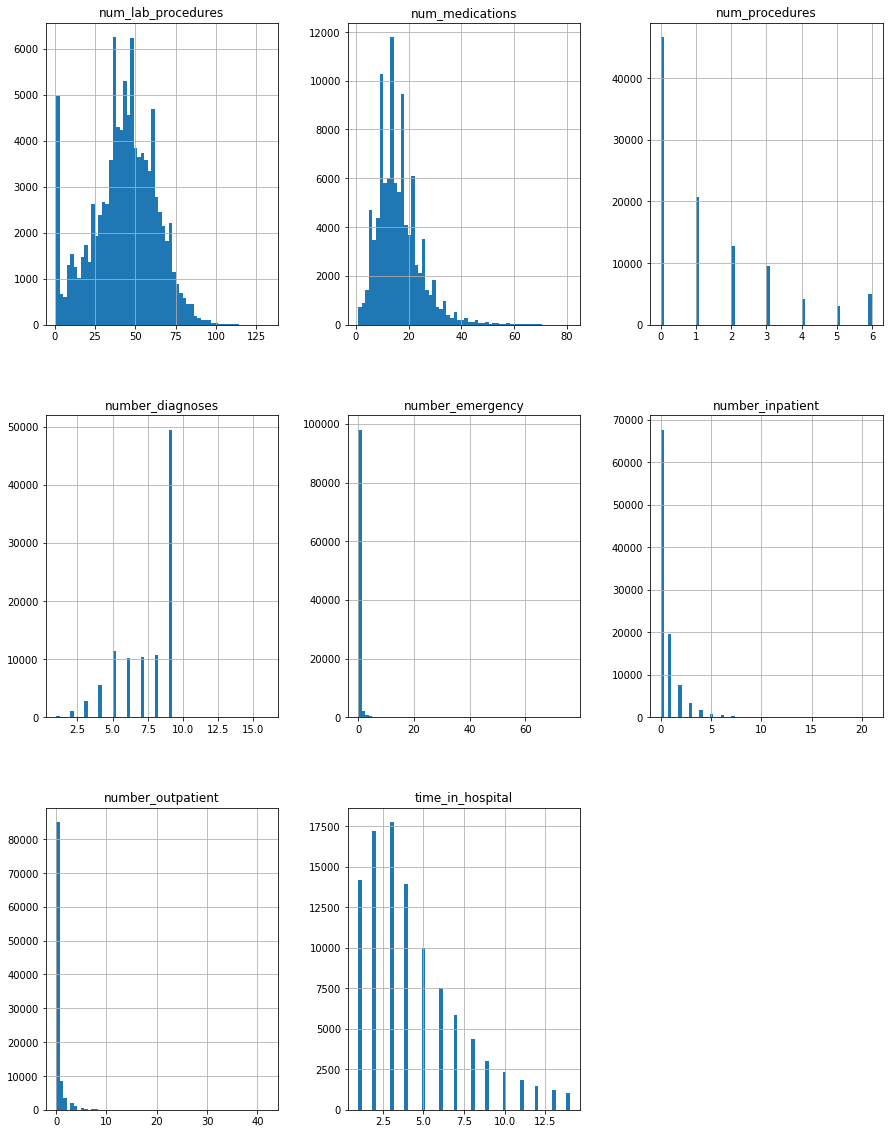

In [20]:
#vemos como se distribuyen los valores
numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10); #esto no es obligatorio

In [32]:
numerical.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [26]:
#Calculamos para cada columna los valores que contiene y qué % tiene cada valor
columnas_cuanti=numerical.columns
for i in columnas_cuanti:
  print(((data_all_re2[i].value_counts()/data_all_re2.shape[0])*100).to_frame())
  print('-------------------------------------------------------------')

    time_in_hospital
3   17.447871       
2   16.925103       
1   13.961441       
4   13.682369       
5   9.793055        
6   7.408172        
7   5.757326        
8   4.314801        
9   2.949905        
10  2.301358        
11  1.822809        
12  1.422872        
13  1.189002        
14  1.023918        
-------------------------------------------------------------
     num_lab_procedures
1    3.152330          
43   2.755341          
44   2.452686          
45   2.334768          
38   2.174597          
40   2.162805          
46   2.151013          
41   2.080263          
42   2.076332          
47   2.069453          
39   2.064540          
37   2.042922          
49   2.030148          
48   2.022286          
36   1.927952          
51   1.891594          
50   1.890612          
35   1.873907          
54   1.855237          
56   1.807087          
52   1.806104          
55   1.804139          
53   1.770729          
57   1.716683          
58   1.678360          

In [27]:
#crear dataframe para las variables cualitativas
cualitativas=data_all_re2.select_dtypes(include=['object']) #dataframe con los valores numéricos
cualitativas.head(2)


,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,diabetesmed,readmitted,descrip_adm_source,descrip_adm_type,descrip_discharge_dispo,encounter,admission_type,discharge_disposition,admission_source,patient_nbr_str
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,NO,Physician Referral,None,Not Mapped,2278392,6,25,1,8222157
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,Yes,>30,Emergency Room,Emergency,Discharged to home,149190,1,1,7,55629189


In [0]:
#Guardamos las columnas en una variable para utilizarlas más adelante
columnas_cuali=cualitativas.columns


In [29]:
#Calculamos para cada columna los valores que contiene y qué % tiene cada valor
for i in columnas_cuali:
  print(((data_all_re2[i].value_counts()/data_all_re2.shape[0])*100).to_frame())
  print('-------------------------------------------------------------')
#Analizamos el % de nulos para cada campo
#Eliminamos el peso porque el 97% de los registros no están informados.
#payer_code, hay un 40% sin informar
#medial_speciality, hay un 49% sin informar
#max_glu_serum tiene un 95% de None 
#a1cresult tiene un 86% de None

  

                      race
Caucasian        74.778413
AfricanAmerican  18.876639
?                2.233555 
Hispanic         2.001651 
Other            1.479866 
Asian            0.629876 
-------------------------------------------------------------
                    gender
Female           53.758623
Male             46.238429
Unknown/Invalid  0.002948 
-------------------------------------------------------------
                age
[70-80)   25.615628
[60-70)   22.092840
[50-60)   16.956547
[80-90)   16.898571
[40-50)   9.516931 
[30-40)   3.709490 
[90-100)  2.744532 
[20-30)   1.628245 
[10-20)   0.679009 
[0-10)    0.158206 
-------------------------------------------------------------
              weight
?          96.858479
[75-100)   1.312816 
[50-75)    0.881434 
[100-125)  0.614154 
[125-150)  0.142484 
[25-50)    0.095317 
[0-25)     0.047167 
[150-175)  0.034393 
[175-200)  0.010809 
>200       0.002948 
-------------------------------------------------------------
    



### Estudiar los nulos en el dataset

In [0]:
data_all_re2.isnull().any() #No hay ningún registro con nulos

race                        False
gender                      False
age                         False
weight                      False
time_in_hospital            False
payer_code                  False
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
a1cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide                 False
pioglitazone                False
rosiglitazone 

In [0]:
#Tras el análisis de las variables categóricas decimimos eliminar lo siguiente:

#categóricas
#weigh porque tiene el 97% de ?
#payer_code porque tiene el 40% de ?
#medical_speciality poruqe tiene el 50% de ?
#max_glu_serum porque tiene None en un 95%
#A1crsult en un 86%

In [46]:
data_all_sincolum=data_all_re2.drop(columns=['weight','a1cresult','payer_code','medical_specialty','max_glu_serum'])
data_all_sincolum.shape
data_all_sincolum.head(2)


,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diabetesmed,readmitted,descrip_adm_source,descrip_adm_type,descrip_discharge_dispo,encounter,admission_type,discharge_disposition,admission_source,patient_nbr_str
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,NO,Physician Referral,None,Not Mapped,2278392,6,25,1,8222157
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,Yes,>30,Emergency Room,Emergency,Discharged to home,149190,1,1,7,55629189




### Estudiar los outliers

In [42]:
#Hacemos análisis de outliers para las variables cuantitativas
columnas_cuanti

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

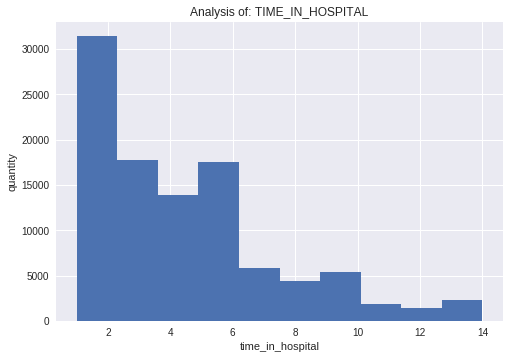

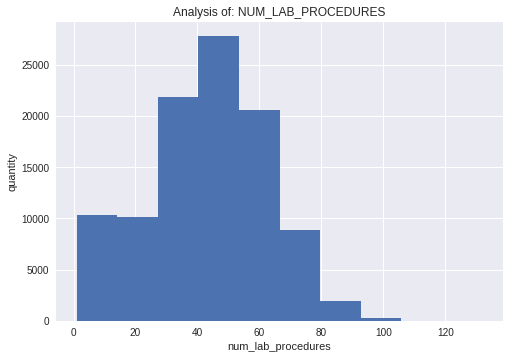

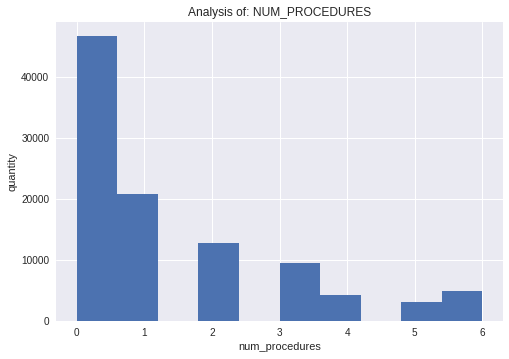

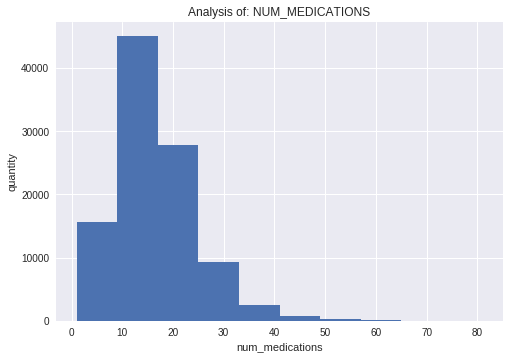

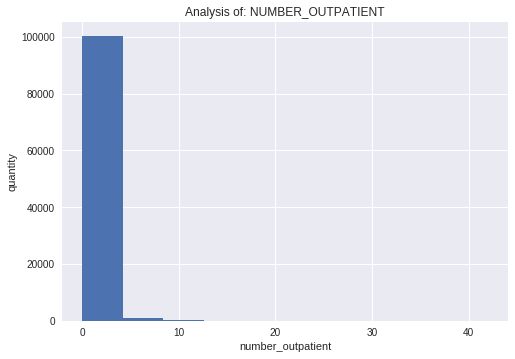

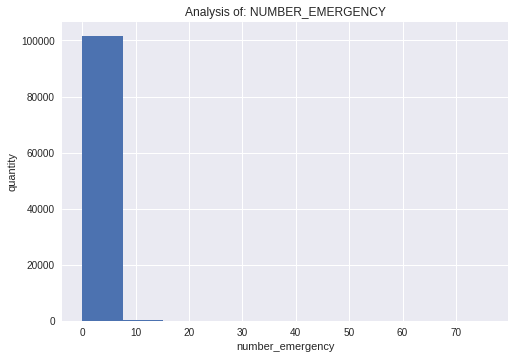

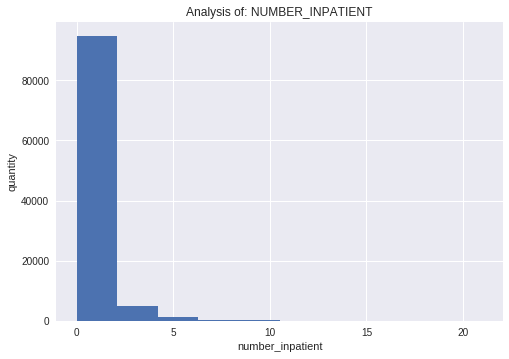

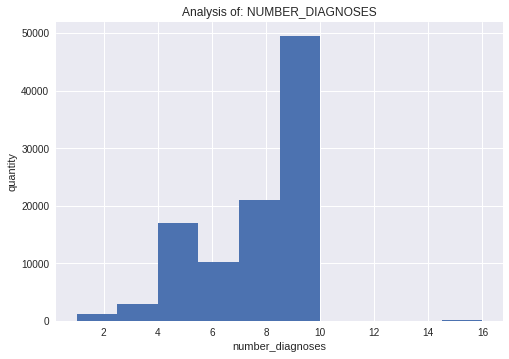

In [47]:
#Obtenemos un histograma para ver la distribución de las vbles cuantitativas a grandes rasgos

for i in columnas_cuanti:
  plt.hist(data_all_sincolum[i])
  plt.xlabel(i)
  plt.ylabel('quantity')
  str_title='Analysis of: ' + i.upper()
  plt.title(str_title)
  plt.show()
  

In [0]:
#Función que se queda con los outliers
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])#q1 es 25 y q3 es 75 y df[column] es la columna
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [49]:
columnas_cuanti

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [50]:
#Creamos un diccionario con las columnas cuantitativas y los outliers que tiene cada una de ellas
di = {}
for i in columnas_cuanti:
  di[i] = tukey_outliers(data_all_sincolum,i,extreme=False).shape[0]

di 
#sacar los valores de los outliers

{'num_lab_procedures': 143,
 'num_medications': 2557,
 'num_procedures': 4954,
 'number_diagnoses': 281,
 'number_emergency': 11383,
 'number_inpatient': 7049,
 'number_outpatient': 16739,
 'time_in_hospital': 2252}

In [0]:
data_all_sincolum.shape[0]

101766

In [0]:
#En este análisis vemos:
#- Las variables que tienen outliers
#- Vemos cuántos outliers tiene cada variable
#- También vemos 2 variables posibles candidatas a eliminar los outliers del data frame compelto, pero antes tenemos que ver si los 
#valores que son outliers tienen sentido o no

In [55]:
#Creamos un diccionario con las columnas cuantitativas y los outliers que tiene cada una de ellas
di = {}
di2 = {}
for i in columnas_cuanti:
  di[i] = tukey_outliers(data_all_sincolum,i,extreme=False).shape[0]
  di2[i] = tukey_outliers(data_all_sincolum,i,extreme=False)[i].value_counts()

di2
#sacar los valores de los outliers

{'num_lab_procedures': 97     31
 98     26
 100    13
 101    13
 99     9 
 102    8 
 103    6 
 105    6 
 106    5 
 109    4 
 108    4 
 113    3 
 111    3 
 104    3 
 114    2 
 132    1 
 129    1 
 118    1 
 120    1 
 121    1 
 126    1 
 107    1 
 Name: num_lab_procedures, dtype: int64, 'num_medications': 37    293
 36    287
 38    228
 39    209
 40    179
 41    146
 42    128
 43    127
 44    100
 46    92 
 45    88 
 47    74 
 49    61 
 48    60 
 50    55 
 52    54 
 51    43 
 53    40 
 56    37 
 54    33 
 55    32 
 57    26 
 58    25 
 60    23 
 59    20 
 62    15 
 61    14 
 63    14 
 65    12 
 64    8  
 67    7  
 68    7  
 66    5  
 69    5  
 72    3  
 70    2  
 75    2  
 81    1  
 79    1  
 74    1  
 Name: num_medications, dtype: int64, 'num_procedures': 6    4954
 Name: num_procedures, dtype: int64, 'number_diagnoses': 1     219
 16    45 
 15    10 
 14    7  
 Name: number_diagnoses, dtype: int64, 'number_emergency': 1     7677
 

In [0]:
#Una vez analizados los valores outliers concluimos que no eliminamos los procedimientos de laboratio y el número de diagnósticos porque los los outliers son lógicos



### Crear variables dummy en caso que sea conveniente

In [0]:
# Creamos un dataframe con los dummis
df_dummy = pd.get_dummies(data_all_sincolum['age'])
df_dummy

,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1


In [0]:
# Creamos un dataframe con los dummis
df_dummy = pd.get_dummies(data_all_sincolum['age'])
# Y los concatenamos con nuestro dataframe
df_total = pd.concat([data_all_sincolum, df_dummy], axis=1)
df_total.head(2)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,0,1,0,0,0,0,0,0,0,0




### Estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

In [0]:
data_all_sincolum.head(2)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diabetesmed,readmitted,descrip_adm_source,descrip_adm_type,descrip_discharge_dispo,encounter,admission_type,discharge_disposition,admission_source,patient_nbr_str
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,NO,Physician Referral,None,Not Mapped,2278392,6,25,1,8222157
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,Yes,>30,Emergency Room,Emergency,Discharged to home,149190,1,1,7,55629189


In [0]:
data_all_sincolum.dtypes

race                        object
gender                      object
age                         object
time_in_hospital            int64 
num_lab_procedures          int64 
num_procedures              int64 
num_medications             int64 
number_outpatient           int64 
number_emergency            int64 
number_inpatient            int64 
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses            int64 
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide          

In [0]:
data_all_sincolum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 48 columns):
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
time_in_hospital            101766 non-null int64
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101766 non-null object
diag_3                      101766 non-null object
number_diagnoses            101766 non-null int64
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              10

In [0]:
data_all_sincolum.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000




### Antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear

In [56]:
#La variable derivada a crear es la edad
#vemos los tramos de edad
data_all_sincolum['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [0]:
def func_tramos_edad(x):
  tramos_edad='0'
  if x == '[0-10)':
    tramos_edad='niños'
  elif x == '[10-20)':
    tramos_edad='adolescentes'
  elif x == '[20-30)':
    tramos_edad='jóvenes'
  elif x == '[30-40)':
    tramos_edad='nuevos jóvenes'
  elif x == '[40-50)':
    tramos_edad='adultos'
  elif x == '[50-60)':
    tramos_edad='prejubilables'
  elif x == '[60-70)':
    tramos_edad='jubilables'
  elif x=='[70-80)':
    tramos_edad='jubilados'
  elif x=='[80-90)':
    tramos_edad='octogenarios'
  else:
    tramos_edad='nonagenarios'
  return tramos_edad

              
    

In [58]:
data_all_sincolum['periodo_vital']=data_all_sincolum['age'].apply(func_tramos_edad)
data_all_sincolum.head(2)



,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,readmitted,descrip_adm_source,descrip_adm_type,descrip_discharge_dispo,encounter,admission_type,discharge_disposition,admission_source,patient_nbr_str,periodo_vital
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,NO,Physician Referral,None,Not Mapped,2278392,6,25,1,8222157,niños
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,>30,Emergency Room,Emergency,Discharged to home,149190,1,1,7,55629189,adolescentes




# Exploratory Data Analysis



### Crear la matriz de correlación

In [0]:
matriz_correlacion=data_all_sincolum.corr()



### Pintar la matriz de correlación

In [0]:
matriz_correlacion

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000




### Determinar qué par de variables están correlacionadas

In [0]:
corr_matrix = data_all_sincolum.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack())
sol[sol > 0.25]

time_in_hospital    num_lab_procedures    0.318450
                    num_medications       0.466135
num_lab_procedures  num_medications       0.268161
num_procedures      num_medications       0.385767
num_medications     number_diagnoses      0.261526
number_emergency    number_inpatient      0.266559
dtype: float64

In [0]:
#Tabla Final: Nos quedamos con los mismos registros iniciales y hemos añadido 3 columnas para las descripciones, hemos añadido una vble para el periodo vital y tal
#y hemos eliminado 5 variables que tenían un alto porcentaje de valores sin informar
data_all_sincolum.shape

(101766, 49)